In [1]:
# Imports
import utils.data_exploration as de

import numpy as np
import pandas as pd

# import numexpr as ne
import matplotlib.pyplot as plt
from torchmetrics.functional.classification import binary_stat_scores

d:\PaperLSTM\pyTorch\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [66]:
# Load Dataframe and confusion matrix
def load_df(i):
    df = pd.read_parquet(f"parquet_data/automation/R{i}_df.parquet")
    CM_df = pd.read_parquet(f"parquet_data/automation/CM/R{i}_CM_df.parquet")
    CM = np.load(f"parquet_data/automation/CM/R{i}_CM.npy", allow_pickle=False)

    # return df
    return df, CM_df, CM


# df = load_df(4)
df, CM_df, CM = load_df(17)
conf_matrix_total = np.sum(CM, axis=0)
metrics = de.conf_matrix_metrics(conf_matrix_total)
# print(df)
print(CM_df)

      TP  FP  TN  FN  TP + FN
0      0   0  63   0        0
1      0   0   0  63       63
2      0   0  63   0        0
3      0   0  63   0        0
4      0   0   0  63       63
...   ..  ..  ..  ..      ...
2995   0   0   0  63       63
2996   0   0   0  63       63
2997   0   0   0  63       63
2998   0   0   0  63       63
2999   0   0   0  63       63

[3000 rows x 5 columns]


FALSE NEGATIVES
Total 
        window idx  event_idx  Pred probability  Pred label  True label  \
63               0          1             7.47%           0           1   
64               1          1            13.19%           0           1   
65               2          1            22.45%           0           1   
66               3          1            15.03%           0           1   
67               4          1            29.74%           0           1   
...            ...        ...               ...         ...         ...   
188995          58       2999            19.20%           0           1   
188996          59       2999            18.02%           0           1   
188997          60       2999            17.48%           0           1   
188998          61       2999            16.93%           0           1   
188999          62       2999            16.50%           0           1   

       Result     TP    FN     FP     TN  TP + FN  
63         FN  False  Tr

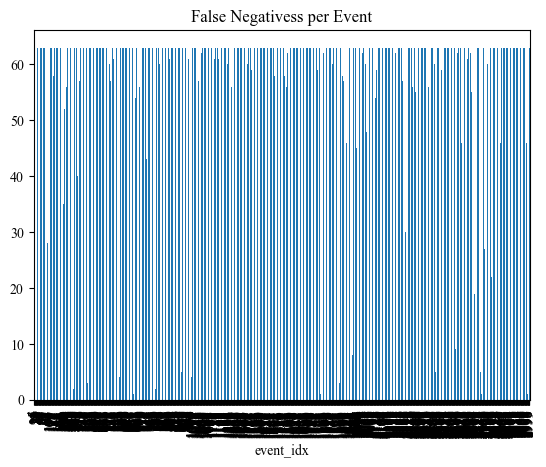

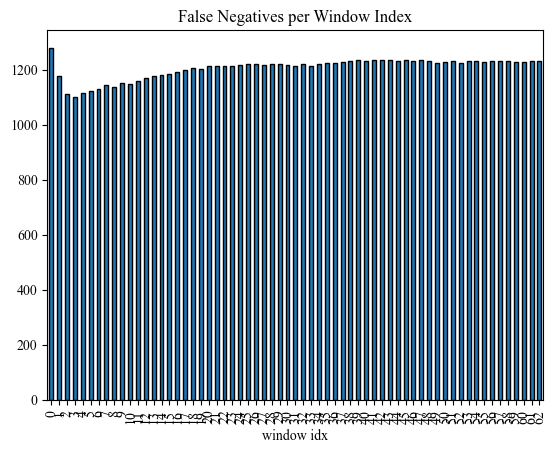

LIMITS RANGE range(0, 6)


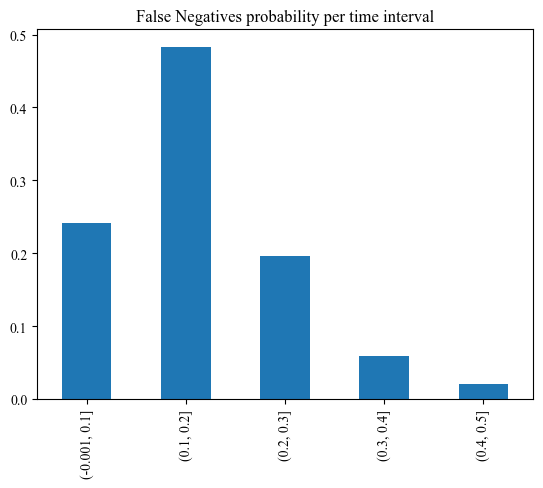

In [68]:
false_positive = df[df["Result"] == "FP"]
false_negative = df[df["Result"] == "FN"]

de.false_events_plots(false_positive, "False Positive")
de.false_events_plots(false_negative, "False Negatives")

In [69]:
# print(conf_matrix_total)
metrics = de.conf_matrix_metrics(conf_matrix_total)
de.print_metrics(metrics)
de.plot_confusion_matrix(metrics)

Total windows:................189000
True Positives:...............15462
False Positives:..............   0
True Negatives:...............97524
False Negatives:..............76014
Accuracy:.....................  59.8%
True Positive Rate:...........  16.9%
False Positive Rate:..........   0.0%
True Negative Rate:........... 100.0%
Positive Predictive Value:.... 100.0%


1
2
3
4
5
6
7
8
9
10
11
12
13
14


C:\Users\ingri\AppData\Local\Temp\ipykernel_9712\2119455947.py:67: UserWarning:

FixedFormatter should only be used together with FixedLocator



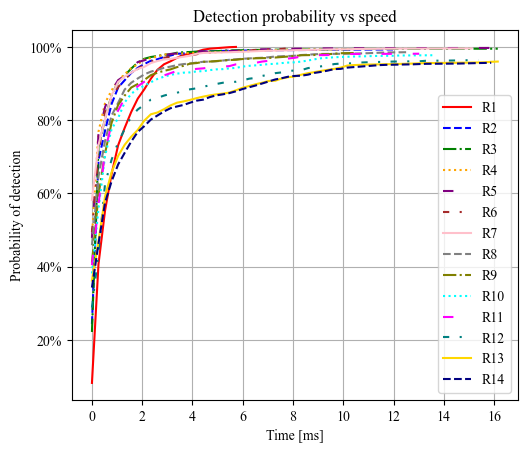

In [38]:
def plot_signals(relay: int, color: str, linestyle: str):
    df = load_df(relay)
    df = de.trip_percentage(df)
    plt.plot(df, label=f"R{relay}", linestyle=linestyle, color=color)


colors = [
    "red",
    "blue",
    "green",
    "orange",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
    "magenta",
    "teal",
    "gold",
    "navy",
    "lime",
    "coral",
    "darkred",
    "darkgreen",
]

linestyles = [
    "-",
    "--",
    "-.",
    ":",
    (0, (5, 10)),
    (0, (3, 5, 1, 5)),
    "-",
    "--",
    "-.",
    ":",
    (0, (5, 10)),
    (0, (3, 5, 1, 5)),
    "-",
    "--",
    "-.",
    ":",
    (0, (5, 10)),
    (0, (3, 5, 1, 5)),
]

for relay, color, linestyle in zip(range(1, 15), colors, linestyles):
    print(relay)
    plot_signals(relay, color, linestyle)
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.title("Detection probability vs speed")
plt.xlabel("Time [ms]")
plt.ylabel("Probability of detection")
ax = plt.gca()
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])

# Customize legend position
ax.legend(loc="center right", bbox_to_anchor=(1.25, 0.5))
plt.gca().set_yticklabels([f"{x:.0%}" for x in plt.gca().get_yticks()])

plt.legend()
plt.grid()
plt.show()

In [70]:
p = df[df["True label"] == 1].event_idx.value_counts().shape[0]
n = df[df["True label"] == 0].event_idx.value_counts().shape[0]
print(f"Fault Events (True): {p} \nNon Fault Events (False): {n}")

tp, fp, tn, fn = de.test_result(df)
metrics = de.conf_matrix_metrics(np.array([tp, fp, tn, fn, tp + fn]))
de.print_metrics(metrics)
de.plot_confusion_matrix(metrics)

Fault Events (True): 1452 
Non Fault Events (False): 1548
True Positives: 509 
False Positives: 0 
True Negatives: 1548 
False Negatives: 943
Total windows:................3000
True Positives:............... 509
False Positives:..............   0
True Negatives:...............1548
False Negatives:.............. 943
Accuracy:.....................  68.6%
True Positive Rate:...........  35.1%
False Positive Rate:..........   0.0%
True Negative Rate:........... 100.0%
Positive Predictive Value:.... 100.0%


In [71]:
print(false_negative["Pred probability"].apply(np.floor).min())
print(false_negative["Pred probability"].min())
print(false_negative["Pred probability"].round(3).min())
print(false_negative["Pred probability"].max())
print(false_positive["Pred probability"].apply(np.floor).min())
print(false_positive["Pred probability"].max())
print(false_positive["Pred probability"].round(3).max())

min_range = (
    range(6) if (false_negative["Pred probability"].min() < 0.5) else range(5, 11)
)
print(min_range)

0.0
0.027209673
0.027
0.49968964
nan
nan
nan
range(0, 6)


In [9]:
# Data Exploration on False Positives and False Negatives

false_positive = df[df["Result"] == "FP"]
false_negative = df[df["Result"] == "FN"]
de.false_events_plots(false_positive, "False Positive")
de.false_events_plots(false_negative, "False Negatives")